In [1]:
#pd.set_option('display.max_rows', 2000)
#pd.set_option('display.max_colwidth', None)

In [1]:
# pip install snscrape
import pandas as pd
import snscrape.modules.twitter as sntwitter
pd.set_option('max_colwidth', None)
import string
import re
import nltk
lemmatizer = nltk.stem.WordNetLemmatizer()
nltk.download("stopwords")
from nltk.corpus import stopwords
stops =  set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h1>SCRAPING DATA FROM TWITTER</h1>

In [2]:


# query="Australia(lang:en until:2022-10-31 since:2017-10-01 -filter:links -filter:replies)"
# tweets = []
# limit = 50000


# for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
#     # print(vars(tweet))
#     # break
#     if len(tweets) == limit:
#         break
#     else:
#         tweets.append([tweet.date, tweet.username, tweet.content,tweet.user.location])
        
# df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet','Location'])


# # to save to csv
# df.to_csv('tweets_new.csv')

In [6]:
#Saving to a file
# df_copy.to_excel('tweets_new.xlsx')

In [7]:
#Reading from a file
df=pd.read_excel('tweets_new.xlsx')

In [8]:
df

,Unnamed: 0,User,Tweet,Location
0,0,CHVSEN_CVSH,"There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let’s just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳","In ya moms mouth, NY"
1,1,g1nfresh,The world can’t heal until Ollie Pope drops 800 runs on Australia in Australia,NaN
2,2,MyFirstCousin,"Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?",NaN
3,3,mysportscores,New South Wales 4 * v South Australia #CricketGame,Canada
4,4,LandDownUndead,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,Australia
...,...,...,...,...
49995,49995,HalcyonW,Nice to see the Progress Pride flag at #PhillipIsland Australia race @MotoGP.,"Rhode Island, USA"
49996,49996,testPatrickW1,New #flood detected in Australia on 2022-10-16T19:06:45\nThis is a Twitter Test Message 6\nProvided by @CopernicusEMS #GloFAS #FloodMonitoring #GFM,NaN
49997,49997,BywaterFelicity,"Next up, because it's spring in Australia, I need to make a hat. But I have plenty of #yarn this time.\n\nIt will be my first hat so there may be some more swearing involved.",Australia
49998,49998,Mintwaveradio,#nowplaying on Mintwave Radio Gramophonedzie - Why Don't You #alexa #streema #Scotland #echo #global #uk #instagram #tiktok #twitter #facebook #linkedin #podcasts #radio #usa #Finland #germany #Belgium #australia #newzealand #southafrica #canada,Global


<h1>DATA PREPROCESSING</h1>

In [9]:
# pip install contractions
import contractions

In [10]:
def expand_contractions(text):
    remove_contract=contractions.fix(text)
    return remove_contract

def remove_url(text):
    removed_url = re.sub(r"http\S+", "", text)
    return removed_url

def remove_punct(specialcharacterfree):
    specialcharacterfree = re.sub(r'[^a-zA-z\s]', ' ', specialcharacterfree)
    specialcharacterfree = specialcharacterfree.replace('\n', ' ')
    specialcharacterfree = specialcharacterfree.replace('_', ' ')
    specialcharacterfree=specialcharacterfree.lower()
    specialcharacterfree=specialcharacterfree.replace('\d+', '')
    return specialcharacterfree

def remove_char(text):
    clean = [i for i in text if len(i) > 1]
    return clean


In [11]:
#Removing URL's
df['remove_url'] = df['Tweet'].apply(remove_url)

In [12]:
#Removing contractions
df['removed_contract'] = df['remove_url'].apply(expand_contractions)

In [13]:
#Removing punctuations
df['removed_punctuations'] = df['removed_contract'].apply(remove_punct)

In [14]:
df

,Unnamed: 0,User,Tweet,Location,remove_url,removed_contract,removed_punctuations
0,0,CHVSEN_CVSH,"There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let’s just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳","In ya moms mouth, NY","There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let’s just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳","There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let us just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳",there is million kangaroos in australia and million people in uruguay let us just say the kangaroos would invade uruguay each person would have to fight kangaroos
1,1,g1nfresh,The world can’t heal until Ollie Pope drops 800 runs on Australia in Australia,NaN,The world can’t heal until Ollie Pope drops 800 runs on Australia in Australia,The world cannot heal until Ollie Pope drops 800 runs on Australia in Australia,the world cannot heal until ollie pope drops runs on australia in australia
2,2,MyFirstCousin,"Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?",NaN,"Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?","Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?",rupert murdoch his son his news rags sky news and his ipa are avoidable burdens that are costing australia millions why is this
3,3,mysportscores,New South Wales 4 * v South Australia #CricketGame,Canada,New South Wales 4 * v South Australia #CricketGame,New South Wales 4 * v South Australia #CricketGame,new south wales v south australia cricketgame
4,4,LandDownUndead,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,Australia,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,get out of newcastle while you can still run australia zombieapocalypse
...,...,...,...,...,...,...,...
49995,49995,HalcyonW,Nice to see the Progress Pride flag at #PhillipIsland Australia race @MotoGP.,"Rhode Island, USA",Nice to see the Progress Pride flag at #PhillipIsland Australia race @MotoGP.,Nice to see the Progress Pride flag at #PhillipIsland Australia race @MotoGP.,nice to see the progress pride flag at phillipisland australia race motogp
49996,49996,testPatrickW1,New #flood detected in Australia on 2022-10-16T19:06:45\nThis is a Twitter Test Message 6\nProvided by @CopernicusEMS #GloFAS #FloodMonitoring #GFM,NaN,New #flood detected in Australia on 2022-10-16T19:06:45\nThis is a Twitter Test Message 6\nProvided by @CopernicusEMS #GloFAS #FloodMonitoring #GFM,New #flood detected in Australia on 2022-10-16T19:06:45\nThis is a Twitter Test Message 6\nProvided by @CopernicusEMS #GloFAS #FloodMonitoring #GFM,new flood detected in australia on t this is a twitter test message provided by copernicusems glofas floodmonitoring gfm
49997,49997,BywaterFelicity,"Next up, because it's spring in Australia, I need to make a hat. But I have plenty of #yarn this time.\n\nIt will be my first hat so there may be some more swearing involved.",Australia,"Next up, because it's spring in Australia, I need to make a hat. But I have plenty of #yarn this time.\n\nIt will be my first hat so there may be some more swearing involved.","Next up, because it is spring in Australia, I need to make a hat. But I have plenty of #yarn this time.\n\nIt will be my first hat so there may be some more swearing involved.",next up because it is spring in australia i need to make a hat but i have plenty of yarn this time it will be my first hat so there may be some more swearing involved
49998,49998,Mintwaveradio,#no

In [15]:
#Removing stopwards
stop_words = stopwords.words('english')
df['stopword_removed'] = df ['removed_punctuations'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [16]:
df

,Unnamed: 0,User,Tweet,Location,remove_url,removed_contract,removed_punctuations,stopword_removed
0,0,CHVSEN_CVSH,"There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let’s just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳","In ya moms mouth, NY","There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let’s just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳","There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let us just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳",there is million kangaroos in australia and million people in uruguay let us just say the kangaroos would invade uruguay each person would have to fight kangaroos,million kangaroos australia million people uruguay let us say kangaroos would invade uruguay person would fight kangaroos
1,1,g1nfresh,The world can’t heal until Ollie Pope drops 800 runs on Australia in Australia,NaN,The world can’t heal until Ollie Pope drops 800 runs on Australia in Australia,The world cannot heal until Ollie Pope drops 800 runs on Australia in Australia,the world cannot heal until ollie pope drops runs on australia in australia,world cannot heal ollie pope drops runs australia australia
2,2,MyFirstCousin,"Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?",NaN,"Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?","Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?",rupert murdoch his son his news rags sky news and his ipa are avoidable burdens that are costing australia millions why is this,rupert murdoch son news rags sky news ipa avoidable burdens costing australia millions
3,3,mysportscores,New South Wales 4 * v South Australia #CricketGame,Canada,New South Wales 4 * v South Australia #CricketGame,New South Wales 4 * v South Australia #CricketGame,new south wales v south australia cricketgame,new south wales v south australia cricketgame
4,4,LandDownUndead,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,Australia,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,get out of newcastle while you can still run australia zombieapocalypse,get newcastle still run australia zombieapocalypse
...,...,...,...,...,...,...,...,...
49995,49995,HalcyonW,Nice to see the Progress Pride flag at #PhillipIsland Australia race @MotoGP.,"Rhode Island, USA",Nice to see the Progress Pride flag at #PhillipIsland Australia race @MotoGP.,Nice to see the Progress Pride flag at #PhillipIsland Australia race @MotoGP.,nice to see the progress pride flag at phillipisland australia race motogp,nice see progress pride flag phillipisland australia race motogp
49996,49996,testPatrickW1,New #flood detected in Australia on 2022-10-16T19:06:45\nThis is a Twitter Test Message 6\nProvided by @CopernicusEMS #GloFAS #FloodMonitoring #GFM,NaN,New #flood detected in Australia on 2022-10-16T19:06:45\nThis is a Twitter Test Message 6\nProvided by @CopernicusEMS #GloFAS #FloodMonitoring #GFM,New #flood detected in Australia on 2022-10-16T19:06:45\nThis is a Twitter Test Message 6\nProvided by @CopernicusEMS #GloFAS #FloodMonitoring #GFM,new flood detected in australia on t this is a twitter test message provided by copernicusems glofas floodmonitoring gfm,new flood detected australia twitter test message provided copernicusems glofas floodmonitoring gfm
49997,49997,BywaterFelicity,"Next up, because it's spring in Australia, I need to make a hat. But I have plenty of #yarn this time.\n\nIt will be my first hat so there may be some more swearing involved.",Australia

In [17]:
#Tokenization
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['stopword_removed']), axis=1)

In [18]:
df

,Unnamed: 0,User,Tweet,Location,remove_url,removed_contract,removed_punctuations,stopword_removed,tokenized_sents
0,0,CHVSEN_CVSH,"There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let’s just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳","In ya moms mouth, NY","There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let’s just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳","There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let us just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳",there is million kangaroos in australia and million people in uruguay let us just say the kangaroos would invade uruguay each person would have to fight kangaroos,million kangaroos australia million people uruguay let us say kangaroos would invade uruguay person would fight kangaroos,"[million, kangaroos, australia, million, people, uruguay, let, us, say, kangaroos, would, invade, uruguay, person, would, fight, kangaroos]"
1,1,g1nfresh,The world can’t heal until Ollie Pope drops 800 runs on Australia in Australia,NaN,The world can’t heal until Ollie Pope drops 800 runs on Australia in Australia,The world cannot heal until Ollie Pope drops 800 runs on Australia in Australia,the world cannot heal until ollie pope drops runs on australia in australia,world cannot heal ollie pope drops runs australia australia,"[world, can, not, heal, ollie, pope, drops, runs, australia, australia]"
2,2,MyFirstCousin,"Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?",NaN,"Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?","Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?",rupert murdoch his son his news rags sky news and his ipa are avoidable burdens that are costing australia millions why is this,rupert murdoch son news rags sky news ipa avoidable burdens costing australia millions,"[rupert, murdoch, son, news, rags, sky, news, ipa, avoidable, burdens, costing, australia, millions]"
3,3,mysportscores,New South Wales 4 * v South Australia #CricketGame,Canada,New South Wales 4 * v South Australia #CricketGame,New South Wales 4 * v South Australia #CricketGame,new south wales v south australia cricketgame,new south wales v south australia cricketgame,"[new, south, wales, v, south, australia, cricketgame]"
4,4,LandDownUndead,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,Australia,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,get out of newcastle while you can still run australia zombieapocalypse,get newcastle still run australia zombieapocalypse,"[get, newcastle, still, run, australia, zombieapocalypse]"
...,...,...,...,...,...,...,...,...,...
49995,49995,HalcyonW,Nice to see the Progress Pride flag at #PhillipIsland Australia race @MotoGP.,"Rhode Island, USA",Nice to see the Progress Pride flag at #PhillipIsland Australia race @MotoGP.,Nice to see the Progress Pride flag at #PhillipIsland Australia race @MotoGP.,nice to see the progress pride flag at phillipisland australia race motogp,nice see progress pride flag phillipisland australia race motogp,"[nice, see, progress, pride, flag, phillipisland, australia, race, motogp]"
49996,49996,testPatrickW1,New #flood detected in Australia on 2022-10-16T19:06:45\nThis is a Twitter Test Message 6\nProvided by @CopernicusEMS #GloFAS #FloodMonitoring #GFM,NaN,New #flood detected in Australia on 2022-10-16T19:06:45\nThis is a Twitter Test Message 6\nProvided by @CopernicusEMS #GloFAS #FloodMonitoring #GFM,New #flood detected in Australia on 2022-10-16T19:0

In [19]:
#Lemmatization
df['lemmatized'] = df['tokenized_sents'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x]) #

In [20]:
df.head(50)

,Unnamed: 0,User,Tweet,Location,remove_url,removed_contract,removed_punctuations,stopword_removed,tokenized_sents,lemmatized
0,0,CHVSEN_CVSH,"There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let’s just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳","In ya moms mouth, NY","There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let’s just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳","There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let us just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳",there is million kangaroos in australia and million people in uruguay let us just say the kangaroos would invade uruguay each person would have to fight kangaroos,million kangaroos australia million people uruguay let us say kangaroos would invade uruguay person would fight kangaroos,"[million, kangaroos, australia, million, people, uruguay, let, us, say, kangaroos, would, invade, uruguay, person, would, fight, kangaroos]","[million, kangaroo, australia, million, people, uruguay, let, u, say, kangaroo, would, invade, uruguay, person, would, fight, kangaroo]"
1,1,g1nfresh,The world can’t heal until Ollie Pope drops 800 runs on Australia in Australia,NaN,The world can’t heal until Ollie Pope drops 800 runs on Australia in Australia,The world cannot heal until Ollie Pope drops 800 runs on Australia in Australia,the world cannot heal until ollie pope drops runs on australia in australia,world cannot heal ollie pope drops runs australia australia,"[world, can, not, heal, ollie, pope, drops, runs, australia, australia]","[world, can, not, heal, ollie, pope, drop, run, australia, australia]"
2,2,MyFirstCousin,"Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?",NaN,"Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?","Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?",rupert murdoch his son his news rags sky news and his ipa are avoidable burdens that are costing australia millions why is this,rupert murdoch son news rags sky news ipa avoidable burdens costing australia millions,"[rupert, murdoch, son, news, rags, sky, news, ipa, avoidable, burdens, costing, australia, millions]","[rupert, murdoch, son, news, rag, sky, news, ipa, avoidable, burden, costing, australia, million]"
3,3,mysportscores,New South Wales 4 * v South Australia #CricketGame,Canada,New South Wales 4 * v South Australia #CricketGame,New South Wales 4 * v South Australia #CricketGame,new south wales v south australia cricketgame,new south wales v south australia cricketgame,"[new, south, wales, v, south, australia, cricketgame]","[new, south, wale, v, south, australia, cricketgame]"
4,4,LandDownUndead,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,Australia,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,get out of newcastle while you can still run australia zombieapocalypse,get newcastle still run australia zombieapocalypse,"[get, newcastle, still, run, australia, zombieapocalypse]","[get, newcastle, still, run, australia, zombieapocalypse]"
5,5,GeoffMarch2,"Gosh. If the Feds interfere with the Gas companies ability to screw its customers and the Australian economy, Australia could end up like Argentina says head of gas company screwing its customers and the Australian economy (Santos) and who earned paltry $6million bonus in 2021.",South Australia,"Gosh. If the Feds interfere with the Gas companies ability to screw its customers and the Australian economy, Australia could end up like Argentina says head o

In [21]:
#Removning single characters
df['final_col'] = df ['lemmatized'].apply(remove_char)

In [22]:
df

,Unnamed: 0,User,Tweet,Location,remove_url,removed_contract,removed_punctuations,stopword_removed,tokenized_sents,lemmatized,final_col
0,0,CHVSEN_CVSH,"There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let’s just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳","In ya moms mouth, NY","There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let’s just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳","There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let us just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳",there is million kangaroos in australia and million people in uruguay let us just say the kangaroos would invade uruguay each person would have to fight kangaroos,million kangaroos australia million people uruguay let us say kangaroos would invade uruguay person would fight kangaroos,"[million, kangaroos, australia, million, people, uruguay, let, us, say, kangaroos, would, invade, uruguay, person, would, fight, kangaroos]","[million, kangaroo, australia, million, people, uruguay, let, u, say, kangaroo, would, invade, uruguay, person, would, fight, kangaroo]","[million, kangaroo, australia, million, people, uruguay, let, say, kangaroo, would, invade, uruguay, person, would, fight, kangaroo]"
1,1,g1nfresh,The world can’t heal until Ollie Pope drops 800 runs on Australia in Australia,NaN,The world can’t heal until Ollie Pope drops 800 runs on Australia in Australia,The world cannot heal until Ollie Pope drops 800 runs on Australia in Australia,the world cannot heal until ollie pope drops runs on australia in australia,world cannot heal ollie pope drops runs australia australia,"[world, can, not, heal, ollie, pope, drops, runs, australia, australia]","[world, can, not, heal, ollie, pope, drop, run, australia, australia]","[world, can, not, heal, ollie, pope, drop, run, australia, australia]"
2,2,MyFirstCousin,"Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?",NaN,"Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?","Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?",rupert murdoch his son his news rags sky news and his ipa are avoidable burdens that are costing australia millions why is this,rupert murdoch son news rags sky news ipa avoidable burdens costing australia millions,"[rupert, murdoch, son, news, rags, sky, news, ipa, avoidable, burdens, costing, australia, millions]","[rupert, murdoch, son, news, rag, sky, news, ipa, avoidable, burden, costing, australia, million]","[rupert, murdoch, son, news, rag, sky, news, ipa, avoidable, burden, costing, australia, million]"
3,3,mysportscores,New South Wales 4 * v South Australia #CricketGame,Canada,New South Wales 4 * v South Australia #CricketGame,New South Wales 4 * v South Australia #CricketGame,new south wales v south australia cricketgame,new south wales v south australia cricketgame,"[new, south, wales, v, south, australia, cricketgame]","[new, south, wale, v, south, australia, cricketgame]","[new, south, wale, south, australia, cricketgame]"
4,4,LandDownUndead,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,Australia,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,get out of newcastle while you can still run australia zombieapocalypse,get newcastle still run australia zombieapocalypse,"[get, newcastle, still, run, australia, zombieapocalypse]","[get, newcastle, still, run, australia, zombieapocalypse]","[get, newcastle, still, run, australia, zombieapocalypse]"
...,...,...,...,...,...,...,...,...,...,...,

In [69]:
df.head(25)

,Unnamed: 0,User,Tweet,Location,remove_url,removed_contract,removed_punctuations,stopword_removed,tokenized_sents,lemmatized,final_col
0,0,CHVSEN_CVSH,"There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let’s just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳","In ya moms mouth, NY","There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let’s just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳","There is 14 million kangaroos in Australia and 3.5 million people in Uruguay. Let us just say the kangaroos would invade Uruguay, each person would have to fight 14 kangaroos 😳",there is million kangaroos in australia and million people in uruguay let us just say the kangaroos would invade uruguay each person would have to fight kangaroos,million kangaroos australia million people uruguay let us say kangaroos would invade uruguay person would fight kangaroos,"[million, kangaroos, australia, million, people, uruguay, let, us, say, kangaroos, would, invade, uruguay, person, would, fight, kangaroos]","[million, kangaroo, australia, million, people, uruguay, let, u, say, kangaroo, would, invade, uruguay, person, would, fight, kangaroo]","[million, kangaroo, australia, million, people, uruguay, let, say, kangaroo, would, invade, uruguay, person, would, fight, kangaroo]"
1,1,g1nfresh,The world can’t heal until Ollie Pope drops 800 runs on Australia in Australia,NaN,The world can’t heal until Ollie Pope drops 800 runs on Australia in Australia,The world cannot heal until Ollie Pope drops 800 runs on Australia in Australia,the world cannot heal until ollie pope drops runs on australia in australia,world cannot heal ollie pope drops runs australia australia,"[world, can, not, heal, ollie, pope, drops, runs, australia, australia]","[world, can, not, heal, ollie, pope, drop, run, australia, australia]","[world, can, not, heal, ollie, pope, drop, run, australia, australia]"
2,2,MyFirstCousin,"Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?",NaN,"Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?","Rupert Murdoch, his son, his news rags, Sky News and his IPA are avoidable burdens that are costing Australia $millions. Why is this?",rupert murdoch his son his news rags sky news and his ipa are avoidable burdens that are costing australia millions why is this,rupert murdoch son news rags sky news ipa avoidable burdens costing australia millions,"[rupert, murdoch, son, news, rags, sky, news, ipa, avoidable, burdens, costing, australia, millions]","[rupert, murdoch, son, news, rag, sky, news, ipa, avoidable, burden, costing, australia, million]","[rupert, murdoch, son, news, rag, sky, news, ipa, avoidable, burden, costing, australia, million]"
3,3,mysportscores,New South Wales 4 * v South Australia #CricketGame,Canada,New South Wales 4 * v South Australia #CricketGame,New South Wales 4 * v South Australia #CricketGame,new south wales v south australia cricketgame,new south wales v south australia cricketgame,"[new, south, wales, v, south, australia, cricketgame]","[new, south, wale, v, south, australia, cricketgame]","[new, south, wale, south, australia, cricketgame]"
4,4,LandDownUndead,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,Australia,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,Get out of Newcastle while you can still run. #Australia #zombieapocalypse,get out of newcastle while you can still run australia zombieapocalypse,get newcastle still run australia zombieapocalypse,"[get, newcastle, still, run, australia, zombieapocalypse]","[get, newcastle, still, run, australia, zombieapocalypse]","[get, newcastle, still, run, australia, zombieapocalypse]"
5,5,GeoffMarch2,"Gosh. If the Feds interfere

<h1>CREATING BIGRAMS AND TRIGRAMS</h1>

In [23]:
import gensim

In [24]:
data_words = df['final_col']

In [25]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=3, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [26]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [27]:
data_words_bigrams = make_bigrams(data_words)

In [28]:
data_words_bigrams

[['million_kangaroo',
  'australia',
  'million',
  'people',
  'uruguay',
  'let',
  'say',
  'kangaroo',
  'would',
  'invade_uruguay',
  'person',
  'would',
  'fight_kangaroo'],
 ['world',
  'can_not',
  'heal',
  'ollie',
  'pope',
  'drop',
  'run',
  'australia',
  'australia'],
 ['rupert_murdoch',
  'son',
  'news',
  'rag',
  'sky_news',
  'ipa',
  'avoidable',
  'burden',
  'costing',
  'australia',
  'million'],
 ['new', 'south_wale', 'south', 'australia', 'cricketgame'],
 ['get', 'newcastle', 'still', 'run', 'australia', 'zombieapocalypse'],
 ['gosh',
  'fed',
  'interfere',
  'gas',
  'company',
  'ability',
  'screw',
  'customer',
  'australian',
  'economy',
  'australia',
  'could',
  'end',
  'like',
  'argentina',
  'say',
  'head',
  'gas',
  'company',
  'screwing',
  'customer',
  'australian',
  'economy',
  'santos',
  'earned',
  'paltry',
  'million',
  'bonus'],
 ['soccer',
  'game',
  'taking',
  'longer',
  'flight',
  'australia',
  'can_not',
  'move',
  

In [29]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [30]:
data_words_trigrams = make_trigrams(data_words_bigrams)

In [31]:
data_words_trigrams

[['million_kangaroo',
  'australia',
  'million',
  'people',
  'uruguay',
  'let',
  'say',
  'kangaroo',
  'would',
  'invade_uruguay',
  'person',
  'would',
  'fight_kangaroo'],
 ['world',
  'can_not',
  'heal',
  'ollie',
  'pope',
  'drop',
  'run',
  'australia',
  'australia'],
 ['rupert_murdoch',
  'son',
  'news',
  'rag',
  'sky_news',
  'ipa',
  'avoidable',
  'burden',
  'costing',
  'australia',
  'million'],
 ['new_south_wale', 'south', 'australia', 'cricketgame'],
 ['get', 'newcastle', 'still', 'run', 'australia', 'zombieapocalypse'],
 ['gosh',
  'fed',
  'interfere',
  'gas_company',
  'ability',
  'screw',
  'customer',
  'australian',
  'economy',
  'australia',
  'could',
  'end',
  'like',
  'argentina',
  'say',
  'head',
  'gas_company',
  'screwing',
  'customer',
  'australian',
  'economy',
  'santos',
  'earned',
  'paltry',
  'million',
  'bonus'],
 ['soccer',
  'game',
  'taking',
  'longer',
  'flight',
  'australia_can_not',
  'move',
  'espn',
  'sure',


 <h1>MODELLING</h1>

<h2>LDA Modelling</h2>

In [32]:
#
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline


In [33]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_trigrams)

# Create Corpus
texts = data_words_trigrams

# Term Document Frequency
# Bag-of-words representation of the documents.
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2)]]


In [34]:
len(id2word)

44496

In [35]:
len(texts)

50000

In [36]:
id2word[3]

'kangaroo'

In [37]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 2)],
 [(0, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)],
 [(0, 1),
  (5, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1)],
 [(0, 1), (28, 1), (29, 1), (30, 1)],
 [(0, 1), (17, 1), (31, 1), (32, 1), (33, 1), (34, 1)],
 [(0, 1),
  (5, 1),
  (9, 1),
  (35, 1),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 2),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(7, 1),
  (11, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1)],
 [(0, 1),
  (7, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 8),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),

In [38]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('australia', 1),
  ('fight_kangaroo', 1),
  ('invade_uruguay', 1),
  ('kangaroo', 1),
  ('let', 1),
  ('million', 1),
  ('million_kangaroo', 1),
  ('people', 1),
  ('person', 1),
  ('say', 1),
  ('uruguay', 1),
  ('would', 2)]]

<h4>performing hyper-parameter tuning for number of topics</h4>

In [39]:
p=[]
c={}

for i in range(1,11):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=i, 
                                           random_state=50,
                                           update_every=2,
                                           chunksize=500,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=False)
    #Compute Perplexity
    print('\nPerplexity for ',i,": ", lda_model.log_perplexity(corpus)) 
    p.append(lda_model.log_perplexity(corpus))

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score for ',i,": ", coherence_lda)
    
    c.update({i: coherence_lda})
   

    


Perplexity for  1 :  -8.321781972795948

Coherence Score for  1 :  0.4089122714449697

Perplexity for  2 :  -8.239994479246272

Coherence Score for  2 :  0.41003310601035436

Perplexity for  3 :  -8.241786137114184

Coherence Score for  3 :  0.4449135071005102

Perplexity for  4 :  -8.309662572873236

Coherence Score for  4 :  0.4739419548050533

Perplexity for  5 :  -8.391202226863847

Coherence Score for  5 :  0.4703043162729864

Perplexity for  6 :  -8.447841355963234

Coherence Score for  6 :  0.4815075589273879

Perplexity for  7 :  -8.55646432209381

Coherence Score for  7 :  0.43550109546908977

Perplexity for  8 :  -8.684687090072533

Coherence Score for  8 :  0.4406775996606951

Perplexity for  9 :  -8.919694944194623

Coherence Score for  9 :  0.49045178191952604

Perplexity for  10 :  -9.281157317030587

Coherence Score for  10 :  0.4344946962269898


In [40]:
topic=max(c, key=c.get)
print(topic)

9


In [48]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=topic, 
                                           random_state=50,
                                           update_every=2,
                                           chunksize=500,
                                           passes=5,
                                           alpha='auto',
                                           per_word_topics=True)

In [49]:
from pprint import pprint

In [50]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.035*"melbourne" + 0.021*"toss" + 0.014*"needed" + 0.011*"visa" + '
  '0.010*"harshal" + 0.010*"book" + 0.009*"statement" + 0.007*"board" + '
  '0.007*"south_korea" + 0.007*"sponsorship"'),
 (1,
  '0.013*"rain" + 0.011*"belgium" + 0.011*"capital" + '
  '0.009*"newzealand_southafrica_canada" + 0.009*"global_uk_instagram_tiktok" '
  '+ 0.009*"twitter_facebook_linkedin_podcasts" + '
  '0.009*"radio_usa_finland_germany" + 0.009*"alexa_streema_scotland_echo" + '
  '0.008*"virat_kohli" + 0.008*"job"'),
 (2,
  '0.038*"urban_goodvibes" + 0.029*"le_talk_music" + 0.021*"nowplaying" + '
  '0.012*"music" + 0.012*"one" + 0.011*"prime_minister" + 0.011*"city" + '
  '0.009*"place_finally_free" + 0.008*"pay" + 0.007*"past"'),
 (3,
  '0.128*"australia" + 0.017*"like" + 0.012*"one" + 0.012*"going" + '
  '0.011*"time" + 0.011*"would" + 0.011*"go" + 0.010*"get" + 0.010*"day" + '
  '0.010*"year"'),
 (4,
  '0.012*"south" + 0.009*"squad" + 0.008*"green" + 0.008*"born" + '
  '0.008*"child" + 0.008*"t

In [53]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_trigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.919694944194623

Coherence Score:  0.49045178191952604


In [54]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)

vis

C:\Users\Admin\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.300341  0.040063       1        1  29.244374
3     -0.300060 -0.004490       2        1  28.055883
7     -0.176490 -0.094499       3        1  15.759846
1      0.093486  0.364574       4        1   7.156341
4      0.132738 -0.063842       5        1   5.273869
5      0.125234 -0.153667       6        1   4.865503
8      0.146335 -0.016845       7        1   4.000010
2      0.128436 -0.038210       8        1   3.935121
0      0.150663 -0.033083       9        1   1.709053, topic_info=            Term          Freq         Total Category  logprob  loglift
0      australia  55597.000000  55597.000000  Default  30.0000  30.0000
415     worldcup   8144.000000   8144.000000  Default  29.0000  29.0000
244        india   5169.000000   5169.000000  Default  28.0000  28.0000
192          amp   3764.000000   3764.000000  Default  27.0000  27.0000
7         people   2285.000000   2285.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
3247  penny_wong     48.434876     49.310350   Topic9  -5.3802   4.0513
8524      ensure     47.552212     48.427452   Topic9  -5.3986   4.0510
622       father     46.620181     47.495192   Topic9  -5.4184   4.0506
2838  talk_music     46.036170     46.911014   Topic9  -5.4310   4.0504
2965      helped     44.927905     45.803067   Topic9  -5.4554   4.0499

[367 rows x 6 columns], token_table=      Topic      Freq                         Term
term                                              
1979      4  0.998105                   absolutely
1690      4  0.995839                       across
2051      2  0.998503                     actually
1556      5  0.997200                      airport
184       4  0.998747  alexa_streema_scotland_echo
...     ...       ...                          ...
11        3  0.001553                        would
176       1  0.009421                         year
176       2  0.987499                         year
176       3  0.002771                         year
617       3  0.997512                          yet

[445 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 8, 2, 5, 6, 9, 3, 1])

In [55]:
# topic_df=pd.DataFrame(columns=['topic','keyword','score'])

In [56]:
# topic_df

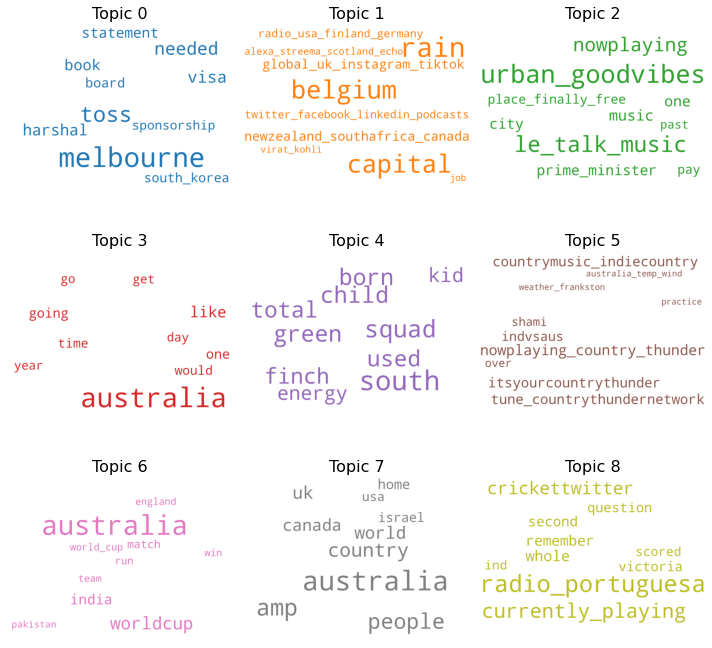

In [68]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()